
<p style="text-align: right">**Réalisé par PowerPuff NBB:
<p style="text-align: right">Njeimi Amal
<p style="text-align: right">Ben Othmen Cyrine
<p style="text-align: right">Bel Hadj Khouloud**</p>


# <p style="text-align: center">Analyse sentimentale des données du réseau social Twitter </p>

## Deuxième partie

### Sujet

La caravane des migrants est un groupe de gens de la petite ville meurtrière de San Pedro Sula au Honduras qui ont réussi à intéresser le monde entier sur leurs conditions de vies déplorables et dangereuses. Partis le 12 octobre 2018 avec l’aide de l’organisation humanitaire Pueblos sin fronteras (« Peuples sans frontières »), ils ont décidé de quitter leur pays en groupe pour mieux s’entraider durant le long parcours vers les Etats-Unis et se protéger des gangs criminels.

## Collecte des données (SCRAPPING)

In [38]:
import tweepy
import csv 
import pylab as P 
import networkx as nx 
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd
from textblob import TextBlob
import re
import warnings
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import datetime


In [26]:

auth = tweepy.auth.OAuthHandler('74zY7DjbcTJqoNDsNfRkkDZ0m', 'AknobQMKyVPXqGglPF8C6J6oYiWKjIhYW2k74OCwi6YulXFMtc')
auth.set_access_token('1048943255478579201-KFAfi3TaVNVdUul2YsrZaYThh4ZzyM', 'SXe9qnpaCvbEo6zKLEdt0aIVniS8fBjWfMwI1HZxHXDu0')

api = tweepy.API(auth)

# Open/create a file to append data to
file_name = 'resultatfinale0.csv'
with open(file_name, 'w', newline='') as csvfile:
   csv_writer = csv.DictWriter(
       f=csvfile,
       fieldnames=["id_tweet","tweet.user_name","Tweet_Date","Tweet","in_reply_to_status_id"]
   )
   csv_writer.writeheader()


csvFile = open('resultatfinale0.csv', 'a')

print("--- Opened a CSV file to store ... \n")
#Use csv writer
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,
                           q = "MIGRANT CARAVAN",
                           #result_type="mixed"
                          ).items():

    # Write a row to the CSV file. I use encode UTF-8
    csvWriter.writerow([tweet.id_str,tweet.user.screen_name,tweet.created_at, tweet.text.encode('utf-8'),tweet.in_reply_to_status_id])
    print (tweet.created_at, tweet.text)
csvFile.close()
csvFile


--- Opened a CSV file to store the results of your sentiment analysis... 

2018-11-01 19:43:36 RT @4YrsToday: Donald Trump thinks George Soros is funding the migrant caravan....

Is he?
2018-11-01 19:43:36 RT @SarahPalinUSA: New Migrant Caravan Used Guns, Molotov Cocktails To Enter Mexico — Why Is No One Talking About This? https://t.co/9miImJ…
2018-11-01 19:43:35 'Light on Facts': Tucker Calls Out 'Wholly Ignorant' Media For 'Dishonesty' on Caravan https://t.co/Jrj0k0io0G
2018-11-01 19:43:35 RT @votevets: FIFTY MILLION. Maybe more.

Donald Trump isn't just abusing our military, by taking them away from crucial training, to do bu…
2018-11-01 19:43:34 RT @drvox: 1. I got a little ranty today about this caravan business. A thread, for those who don't want the 3K-word version. https://t.co/…
2018-11-01 19:43:33 RT @nowthisnews: Fox News anchor Shep Smith ripped apart his own network for giving misinformation and inciting fear of the migrant caravan…
2018-11-01 19:43:32 Fox News’ Shep Smit

TweepError: Twitter error response: status code = 429

### Importation des données 

In [65]:
datasetsentimental = pd.read_csv('resultatfinale0.csv')
datasetsentimental.head(6)


id_tweet  tweet.user_name           Tweet_Date  \
0  1058082146152255489        Bakerfour  2018-11-01 19:43:36   
1  1058082146080972801    HouseGrayWolf  2018-11-01 19:43:36   
2  1058082143702671361     SherieSmith7  2018-11-01 19:43:35   
3  1058082140473253889  AthenaSidiropo2  2018-11-01 19:43:35   
4  1058082136929042441      frankieindc  2018-11-01 19:43:34   
5  1058082133430874112       bigfatkatt  2018-11-01 19:43:33   

                                               Tweet  in_reply_to_status_id  
0  b'RT @4YrsToday: Donald Trump thinks George So...                    NaN  
1  b'RT @SarahPalinUSA: New Migrant Caravan Used ...                    NaN  
2  b"'Light on Facts': Tucker Calls Out 'Wholly I...                    NaN  
3  b"RT @votevets: FIFTY MILLION. Maybe more.\n\n...                    NaN  
4  b"RT @drvox: 1. I got a little ranty today abo...                    NaN  
5  b'RT @nowthisnews: Fox News anchor Shep Smith ...                    NaN

### Construction des listes des noeuds et des arêtes

In [40]:
Ltotal=[]
for i in datasetsentimental['tweet.user_name']:
    l=[]
    l.append(i)
    for j in range(len(datasetsentimental)):
        if (datasetsentimental.loc[j,"Tweet"].find("b'RT @"+i)!=-1 or datasetsentimental.loc[j,"Tweet"].find('b"RT @'+i)!=-1):
            l.append(datasetsentimental.loc[j,"tweet.user_name"])
    Ltotal.append(l)

In [41]:
lneouds=[]
leges=[]
for k in Ltotal:
    if (len(k)!=1):
        leges.append(k)
    else:
        lneouds.append(k)

### Graphe

Nous avons utilisé les noms de tweeters et retweeters comme nœuds et la relation entre eux comme des arêtes afin de construire notre graphique pour montrer l’état du réseau social Twitter après le départ du caravane de migrants mexicain vers les Etats-Unis.

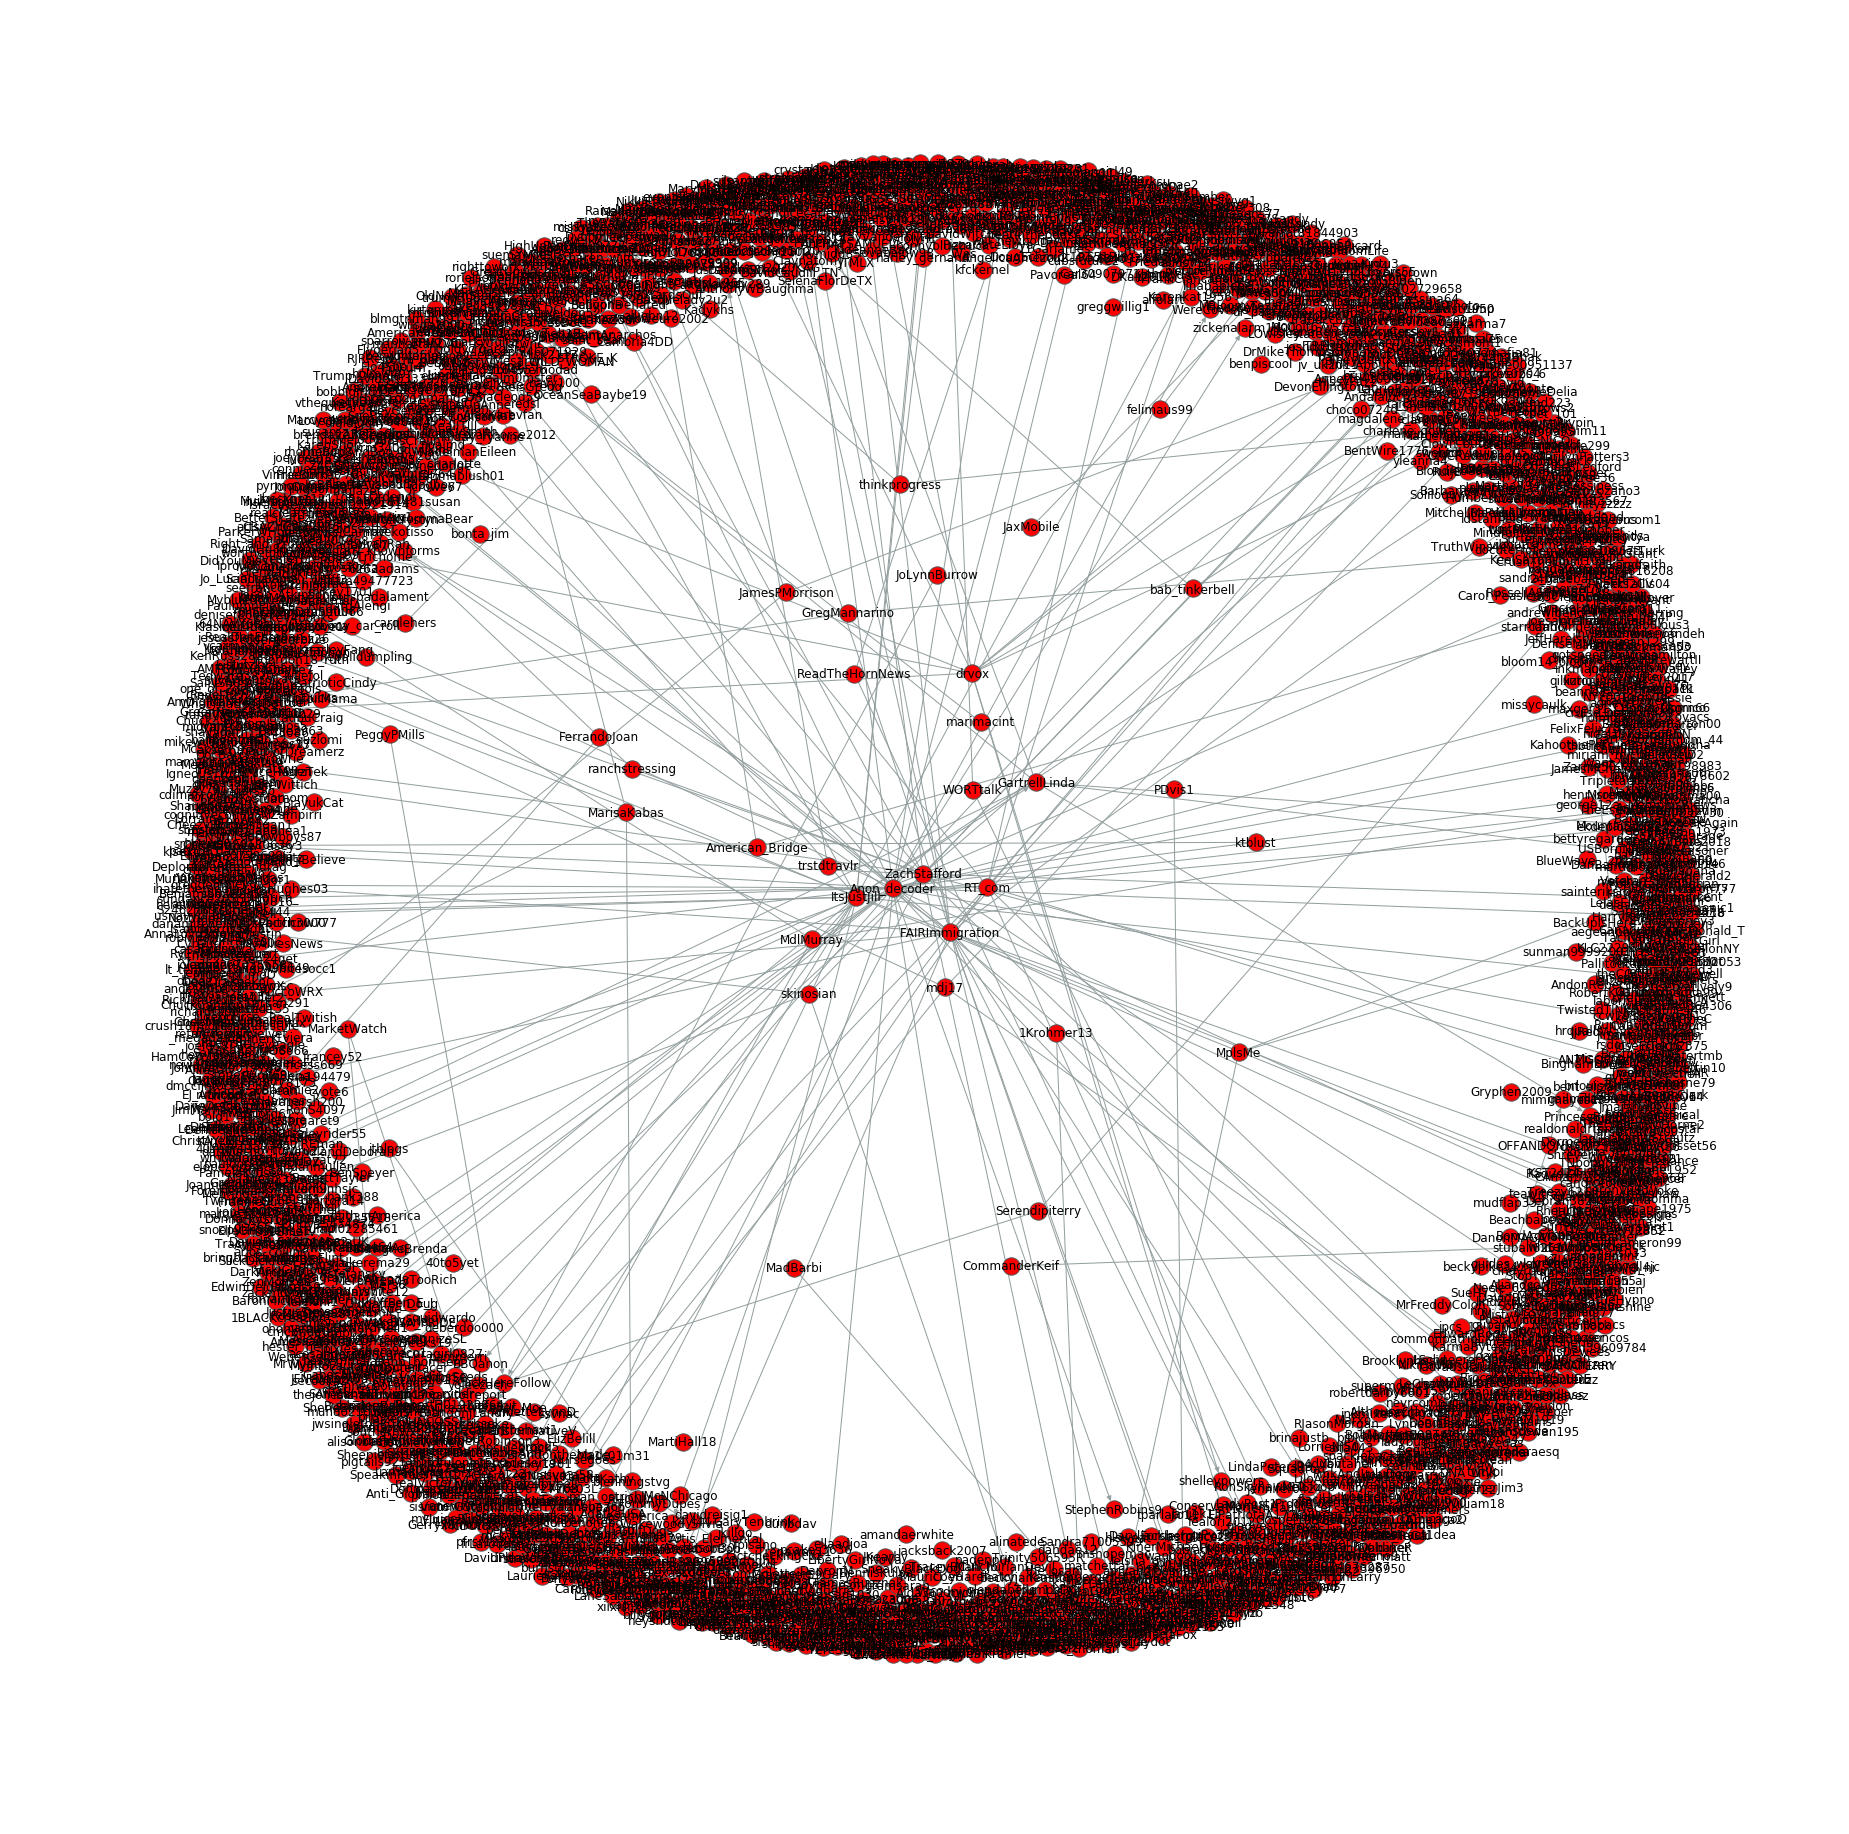

In [43]:
warnings.filterwarnings('ignore')
G=nx.DiGraph()
for k in lneouds:
    G.add_node(k[0])
i=1
for f in leges:
    for i in range(len(f)):
        G.add_edge(f[0],f[i])
plt.figure(figsize=(25,25))
options = {
    'edge_color': '#939e9e',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}
nx.draw(G ,pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()

## Les degrées des noeuds

In [44]:
degrees=pd.DataFrame( list(G.out_degree()),columns=['node_name', 'Nombre de retweeters'])
x=degrees.sort_values(by='Nombre de retweeters',ascending=False).head(11)
x

node_name  Nombre de retweeters
2322     Anon_decoder                    35
2320  FAIRImmigration                    25
2325      ItsJustJill                    22
2304     ZachStafford                    19
2310            drvox                    13
2308           RT_com                    11
2326    GartrellLinda                     7
2337            mdj17                     5
2329      MarisaKabas                     5
2334        skinosian                     5
2317        MdlMurray                     4

Ceux sont les tweeters qui ont les tweets les plus tweetés

Text(0.5,1,'Représentation des top 11 degrés')

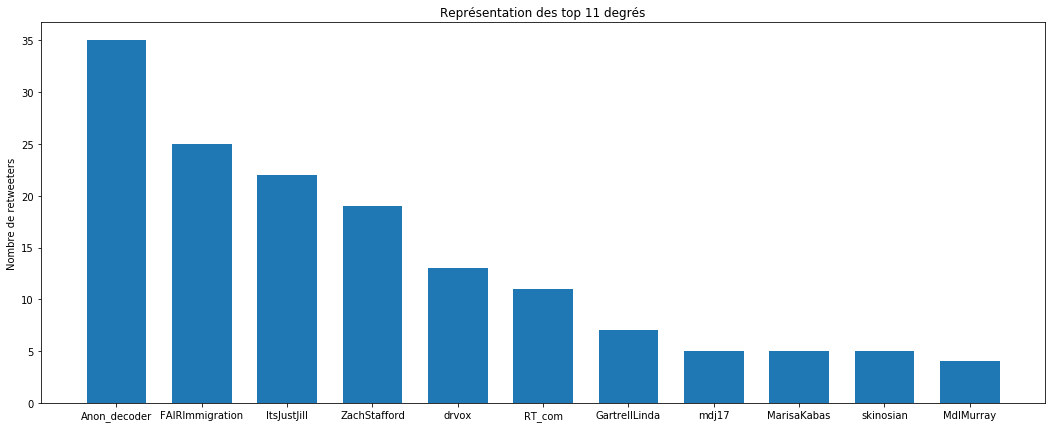

In [45]:
plt.figure(1,figsize=(18,7))
plt.bar(x['node_name'], x['Nombre de retweeters'], width=0.7, bottom=None, align='center')
plt.ylabel('Nombre de retweeters')
plt.title("Représentation des top 11 degrés")

### Exportation des noeuds et des edges 

On va exportater le noeuds et les liens en des fichiers excel pour les utiliser dans Gephi

In [6]:
file_name = 'liensCaravane0.csv'
with open(file_name, 'w', newline='') as csvfile:
   csv_writer = csv.DictWriter(
       f=csvfile,
       fieldnames=["source","target"]
   )
   csv_writer.writeheader()

csvFile = open('liensCaravane0.csv', 'a')

print("--- Ouvrir le fichier pour enregistrer les liens... \n")
#Use csv writer
csvWriter = csv.writer(csvFile)
for i in leges:
    j=1
    for j in range(len(i)):
        
         csvWriter.writerow([i[j],i[0]])
            
print('ok')
csvFile.close()
csvFile

--- Ouvrir le fichier pour enregistrer les liens... 

ok


<_io.TextIOWrapper name='liensCaravane0.csv' mode='a' encoding='cp1252'>

In [154]:
nodes_caravane = pd.DataFrame(datasetsentimental, columns=['tweet.user_name'])
nodes_caravane.to_csv('nodes_caravane.csv')

### Graphe avec gephi

![grapheGephy](grapheGephy2.png "graphe Gephy")

D'après le graphe obtenu à partir du Gephi , on constate que les utilisateurs qui ont les tweet les plus retweetés sont les mêmes du graphe obtenu à partir du python.

# Analyse sentimental

### Nettoyage des Tweets


Avant de commencer à créer l'analyseur, nous devons d'abord supprimer le bruit et pré-traiter les tweets en procédant comme suit:
<ol>
<li> Minuscules - Convertissez les tweets en minuscules.</li>
<li> URL - Éliminez toutes ces URL via une correspondance d'expression régulière ou remplacez-les par une URL de mot générique.</li>
<li> @username - Supprimez "@username" via la correspondance rationnelle ou remplacez-le par le mot générique AT_USER.</li>
<li> #hashtag - remplace les hashtags par le même mot exact sans le hachage (les balises de hachage peuvent fournir des informations utiles).</li>
<li> Ponctuations et espaces blancs supplémentaires - supprimez la ponctuation au début et à la fin des tweets.</li>
</ol>

In [46]:
def clean_tweet(tweet):
# process the tweets

    #Convertir en minuscule
    tweet = tweet.lower()
    #Convertir www.* ou https?://* en URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convertir @username en AT_USER
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #supprimer les espaces blancs supplémentaires
    tweet = re.sub('[\s]+', ' ', tweet)
    #Remplacer #word avec word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #réduire
    tweet = tweet.strip('\'"')
    return tweet 

def analize_sentiment(tweet):  
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

Nous allons maintenant ajouter  une colonne supplémentaire à nos données. Cette colonne contiendra l'analyse des sentiments

In [47]:
datasetsentimental['Sentiment'] = np.array([ analize_sentiment(tweet) for tweet in datasetsentimental['Tweet'] ])
datasetsentimental.head()

id_tweet  tweet.user_name           Tweet_Date  \
0  1058082146152255489        Bakerfour  2018-11-01 19:43:36   
1  1058082146080972801    HouseGrayWolf  2018-11-01 19:43:36   
2  1058082143702671361     SherieSmith7  2018-11-01 19:43:35   
3  1058082140473253889  AthenaSidiropo2  2018-11-01 19:43:35   
4  1058082136929042441      frankieindc  2018-11-01 19:43:34   

                                               Tweet  in_reply_to_status_id  \
0  b'RT @4YrsToday: Donald Trump thinks George So...                    NaN   
1  b'RT @SarahPalinUSA: New Migrant Caravan Used ...                    NaN   
2  b"'Light on Facts': Tucker Calls Out 'Wholly I...                    NaN   
3  b"RT @votevets: FIFTY MILLION. Maybe more.\n\n...                    NaN   
4  b"RT @drvox: 1. I got a little ranty today abo...                    NaN   

   Sentiment  
0          0  
1          1  
2          1  
3         -1  
4         -1

In [48]:
datasetsentimental[ 'Sentiment'].replace([0,-1,1],["neutral","negative","positive"], inplace=True)
datasetsentimental.head()

id_tweet  tweet.user_name           Tweet_Date  \
0  1058082146152255489        Bakerfour  2018-11-01 19:43:36   
1  1058082146080972801    HouseGrayWolf  2018-11-01 19:43:36   
2  1058082143702671361     SherieSmith7  2018-11-01 19:43:35   
3  1058082140473253889  AthenaSidiropo2  2018-11-01 19:43:35   
4  1058082136929042441      frankieindc  2018-11-01 19:43:34   

                                               Tweet  in_reply_to_status_id  \
0  b'RT @4YrsToday: Donald Trump thinks George So...                    NaN   
1  b'RT @SarahPalinUSA: New Migrant Caravan Used ...                    NaN   
2  b"'Light on Facts': Tucker Calls Out 'Wholly I...                    NaN   
3  b"RT @votevets: FIFTY MILLION. Maybe more.\n\n...                    NaN   
4  b"RT @drvox: 1. I got a little ranty today abo...                    NaN   

  Sentiment  
0   neutral  
1  positive  
2  positive  
3  negative  
4  negative

### Visualisation des résultats

In [49]:
pos_tweets = [ tweet for index, tweet in enumerate(datasetsentimental['Tweet']) if datasetsentimental['Sentiment'][index] =="positive"]
neu_tweets = [ tweet for index, tweet in enumerate(datasetsentimental['Tweet']) if datasetsentimental['Sentiment'][index] == "neutral"]
neg_tweets = [ tweet for index, tweet in enumerate(datasetsentimental['Tweet']) if datasetsentimental['Sentiment'][index] =="negative"]

In [50]:
print("Pourcentage des tweets positifs: {}%".format(len(pos_tweets)*100/len(datasetsentimental['Tweet'])))
print("Pourcentage des tweets neutres: {}%".format(len(neu_tweets)*100/len(datasetsentimental['Tweet'])))
print("Pourcentage des tweets négatifs: {}%".format(len(neg_tweets)*100/len(datasetsentimental['Tweet'])))

Pourcentage des tweets positifs: 35.205427817565024%
Pourcentage des tweets neutres: 42.70637014700339%
Pourcentage des tweets négatifs: 22.088202035431586%


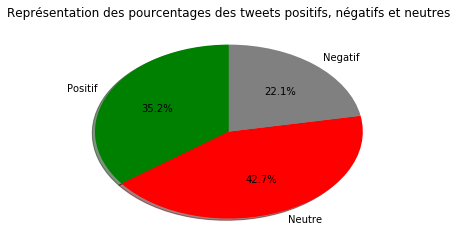

In [51]:

colors = ['green', 'red', 'grey']
sizes = [format(len(pos_tweets)*100/len(datasetsentimental['Tweet'])),format(len(neu_tweets)*100/len(datasetsentimental['Tweet'])),format(len(neg_tweets)*100/len(datasetsentimental['Tweet']))]
labels = 'Positif', 'Neutre','Negatif'

## use matplotlib to plot the chart
plt.pie(
   x=sizes,
   shadow=True,
   colors=colors,
   labels=labels,
   startangle=90,autopct='%1.1f%%'
)
plt.title("Représentation des pourcentages des tweets positifs, négatifs et neutres")
plt.show()

Comme nous pouvons le constater sur ce graphique, il y a beaucoup plus de tweets neutres sur la caravane des migrants mexicain. Puis on trouve les tweets positives. On déduit ainsi que les gens dans cette periode n'étaient pas contre cet événement. Ils veulent plus au moins les soutenirs vu leurs conditions de vies déplorables et dangereuses.

#### Evolution des Tweets par temps classé par sentiment 

Compter et grouper les tweets par dates

In [52]:
datasetsentimental['Tweet_Date'] = pd.to_datetime(datasetsentimental['Tweet_Date'])
datasetsentimental['Tweet_Date'] = datasetsentimental['Tweet_Date'].values.astype('<M8[m]')

counting_pos = datasetsentimental.loc[datasetsentimental['Sentiment']
                       =='positive'][['Sentiment','Tweet_Date']].groupby('Tweet_Date').agg(['count'])

counting_neg = datasetsentimental.loc[datasetsentimental['Sentiment']
                       =='negative'][['Sentiment','Tweet_Date']].groupby('Tweet_Date').agg(['count'])

counting_neut = datasetsentimental.loc[datasetsentimental['Sentiment']
                       =='neutral'][['Sentiment','Tweet_Date']].groupby('Tweet_Date').agg(['count'])



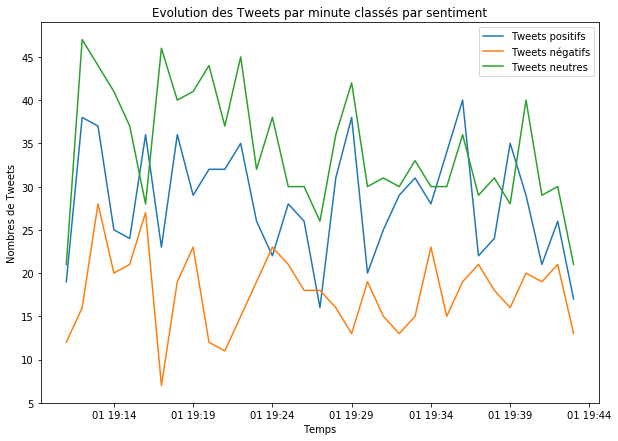

In [53]:
plt.figure(3,figsize=(10, 7))
plt.plot(counting_pos, label='Tweets positifs')
plt.plot(counting_neg, label='Tweets négatifs')
plt.plot(counting_neut, label='Tweets neutres')
plt.xlabel('Temps')
plt.ylabel('Nombres de Tweets')
plt.title('Evolution des Tweets par minute classés par sentiment')
P.legend(loc='upper right')

Ce graphique présente la réaction des tweeters sur le caravane. Au début il y a une augmentation remarquable des tweets positifs, négatifs et neutres.De plus l'évolution des Tweets neutres et positifs restent toujours  dominante.

#### Les mots les plus fréquents  "WordCloud"

L'analyse des sentiments permet également de découvrir les mots les plus fréquemment utilisés parmi les tweets positifs, négatifs ou neutres. Dans le graphique ci-dessous, plus la taille du mot est grande, plus la fréquence de ce mot apparaissant dans une série de tweets est élevée.

#### Les tweets négatifs

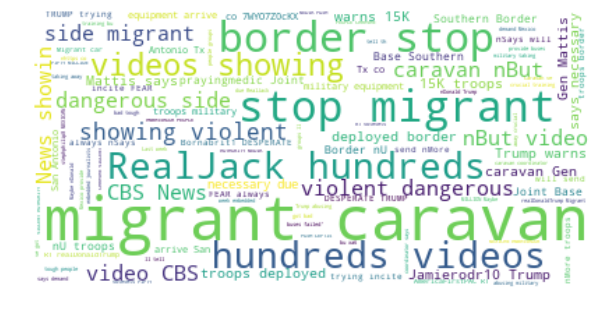

In [54]:
text = " ".join(review for review in neg_tweets)
stopwords = set(STOPWORDS)
stopwords.update(["b'RT", "xe2", "x80", "x99", "xa6'", "x91","x99s", "x9f", "xf0", "x87", "https"])

wordcloud = WordCloud(max_font_size=100, stopwords=stopwords, background_color="white").generate(text)

fig = plt.figure(1, figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Nous pouvons voir que les mots les plus fréquents dans les tweets négatifs sont : stop, violent,border,dangerous .... 

#### Les tweets neutres

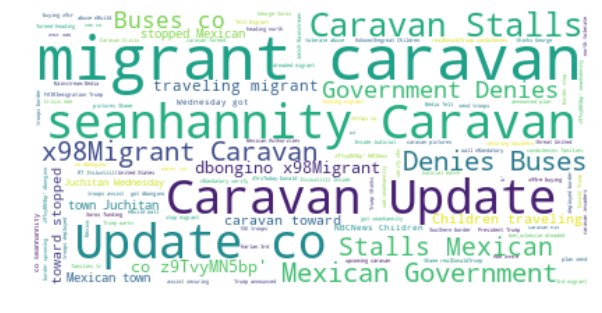

In [55]:
text = " ".join(review for review in neu_tweets)
stopwords = set(STOPWORDS)
stopwords.update(["b'RT", "xe2", "x80", "x99", "xa6'", "x91", "x9f", "xf0", "x87", "https","x98","xbb","x8f","y7KK1t9UM7'"])

wordcloud = WordCloud(max_font_size=100, stopwords=stopwords, background_color="white").generate(text)

fig = plt.figure(1, figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Nous pouvons aussi voir que les mots les plus fréquents dans les tweets neutres sont : buses,update, caravan,mexican,government ...

#### Les tweets positifs

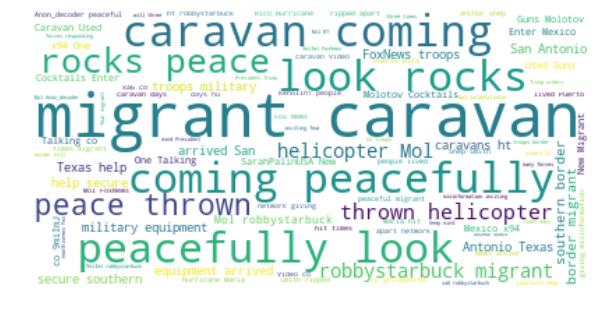

In [56]:
text = " ".join(review for review in pos_tweets)
stopwords = set(STOPWORDS)
stopwords.update(["b'RT", "xe2", "x80", "x99", "xa6'", "x91", "x9f", "xf0", "x87", "https"])
wordcloud = WordCloud(max_font_size=100, stopwords=stopwords, background_color="white").generate(text)
fig = plt.figure(1, figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Et pour les mots les plus fréquents dans les tweets positifs sont: peace,peacefully,secure....

In [24]:
#wordcloud.to_file("first_review.png")